<a href="https://colab.research.google.com/github/kh9yaz/124Rus/blob/master/ITOI_lab3_06_03_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ефимов Константин Алексеевич
МИЗ24-01

Лабораторная работа 3
Задача кластеризации

# Импорт необходимых пакетов

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn packages
import sklearn.metrics as mtrx # меры качества

from scipy.cluster.hierarchy import dendrogram # дендрограмма
from sklearn.cluster import AgglomerativeClustering # агломеративная кластеризация
from sklearn.cluster import KMeans # к-средних

In [3]:
# отключить некоторые предупреждения (это не ошибки, на работу не влияют)
import warnings
from IPython.display import display
warnings.filterwarnings('ignore')

# Сгенерируем искуственную задачу

Сгенерируем 3 нормально распределенных и непересекающиеся группы данных.

In [4]:
# [0,10]
x1=np.random.normal(3,0.7,20)
y1=np.random.normal(2,0.5,20)
label1=np.array([1]*20)

x2=np.random.normal(7,0.7,20)
y2=np.random.normal(4,0.5,20)
label2=np.array([2]*20)

x3=np.random.normal(4,1,20)
y3=np.random.normal(7,0.7,20)
label3=np.array([3]*20)

Построим график

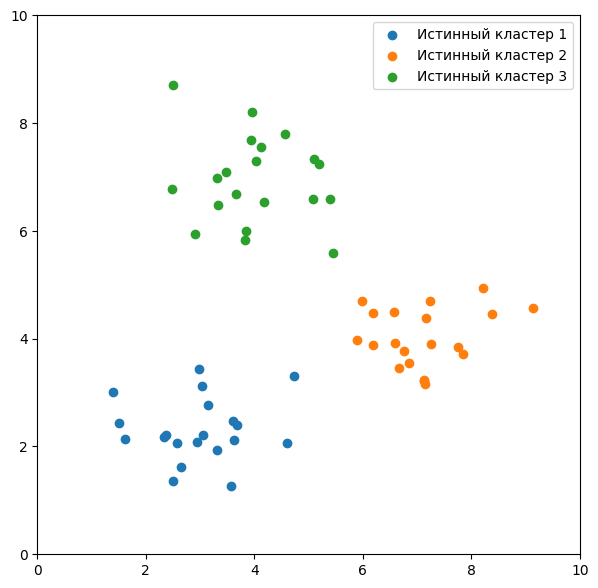

In [5]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(x1, y1, label = "Истинный кластер 1")
ax.scatter(x2, y2, label = "Истинный кластер 2")
ax.scatter(x3, y3, label = "Истинный кластер 3")
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.legend()
plt.show()

График того, как задачу "видит" алгоритм кластеризации. Информация о числе кластеров и принадлежности к кластерам отсутствует.

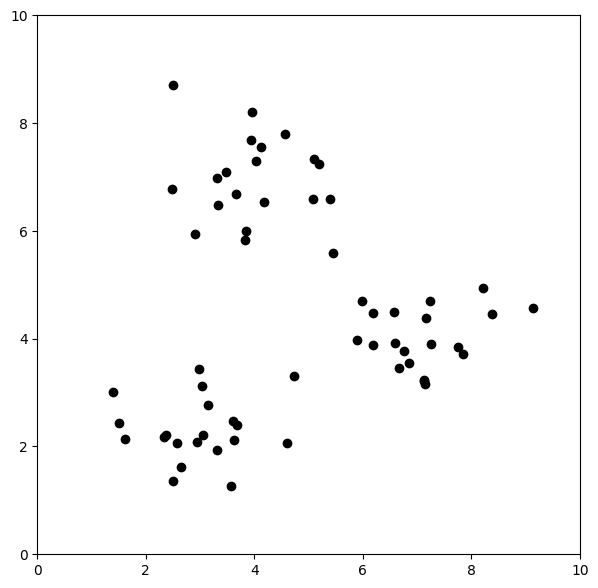

In [6]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(x1, y1, color='black')
ax.scatter(x2, y2, color='black')
ax.scatter(x3, y3, color='black')
ax.set_xlim(0,10)
ax.set_ylim(0,10)
plt.show()

Сохраним в датафрейм. Метки групп мы используем только для проверки для себя, алгоритм про них не будет знать.

In [7]:
x=np.concatenate((x1,x2,x3))
y=np.concatenate((y1,y2,y3))
label=np.concatenate((label1,label2,label3))
data3=pd.DataFrame({'x':x,'y':y, 'label':label})
display(data3.head(3))
display(data3.tail(3))

,x,y,label
0,3.626399,2.121789,1
1,3.610910,2.478623,1
2,1.614393,2.129630,1


,x,y,label
57,4.029470,7.303264,3
58,5.078884,6.582780,3
59,3.948884,8.199238,3


# Дентрограмма

Построим дендрограмму (функция взята с сайта matplotlib).

In [8]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

Для построения нужно применить агломеративный метод.

In [9]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(data3[['x','y']])

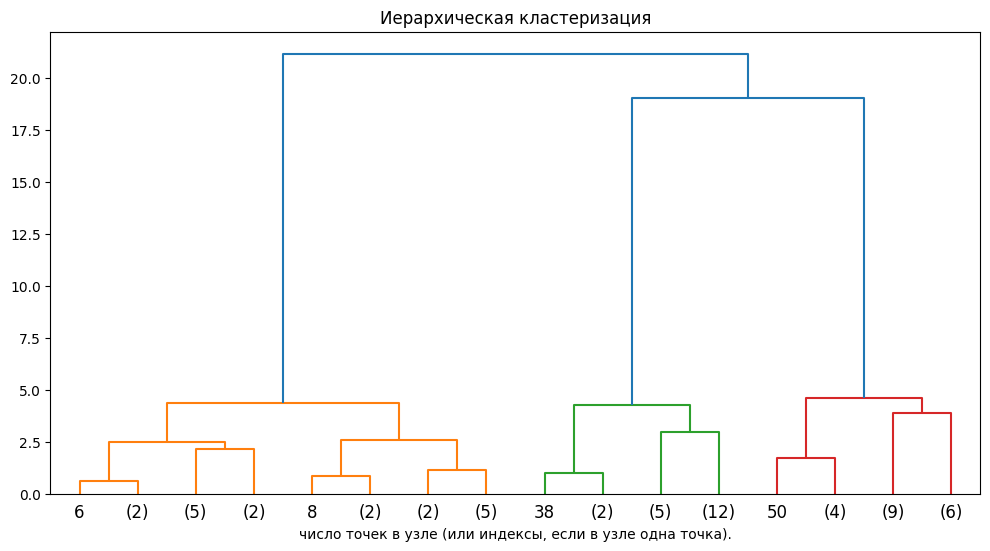

In [10]:
plt.rcParams["figure.figsize"] = (12,6)
plt.title('Иерархическая кластеризация')
# нарисуем только 3 уровня дерава
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("число точек в узле (или индексы, если в узле одна точка).")
plt.show()

Постройте дерево без отсечения веток.

plot_dendrogram(model~~, truncate_mode='level', p=3~~)

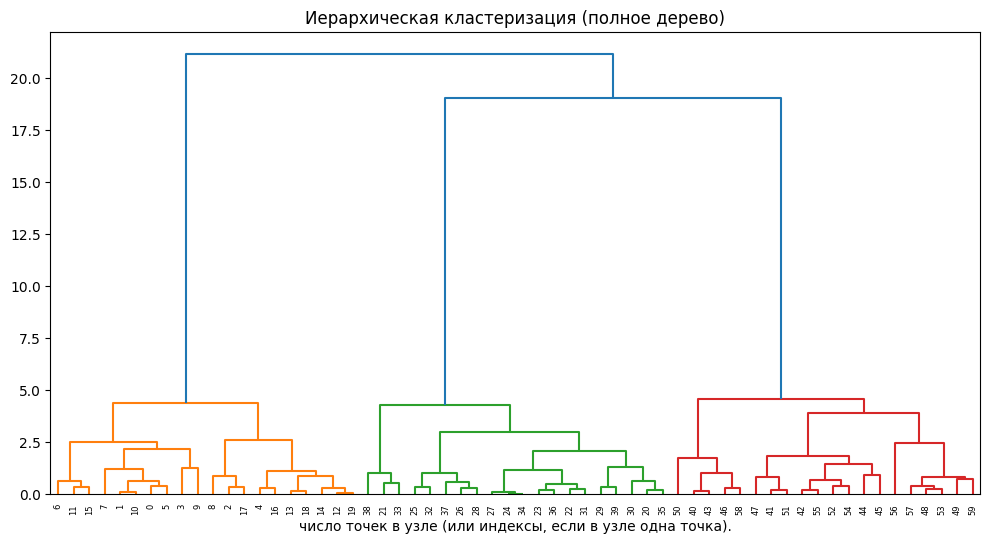

In [16]:
plt.rcParams["figure.figsize"] = (12, 6)
plt.title('Иерархическая кластеризация (полное дерево)')
plot_dendrogram(model)
plt.xlabel("число точек в узле (или индексы, если в узле одна точка).")
plt.show()

Сделайте по дендрограмме выводы о возможном числе кластеров.

Три кластера

# Метод К-средних

Решим задачу с 2 и 4 кластерами несколько раз.

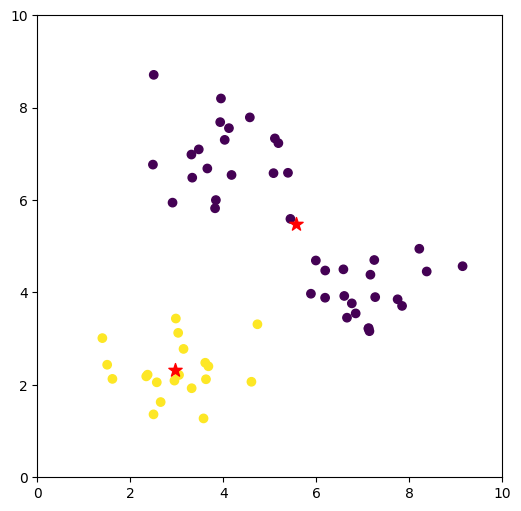

In [17]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data3[['x','y']])

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(data3['x'], data3['y'], c=kmeans.labels_)
ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], marker='*', s=100, color='red')
ax.set_xlim(0,10)
ax.set_ylim(0,10)
plt.show()

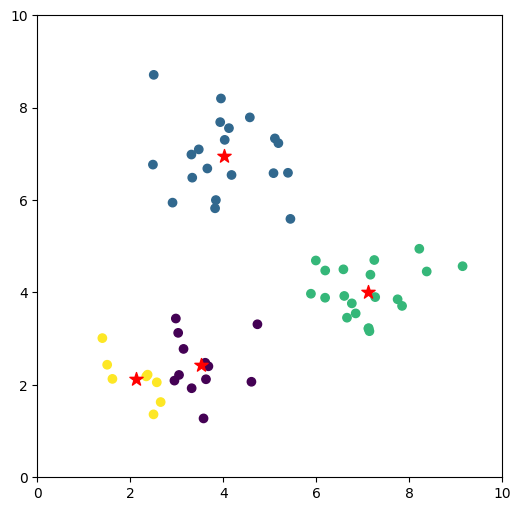

In [19]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data3[['x','y']])

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(data3['x'], data3['y'], c=kmeans.labels_)
ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], marker='*', s=100, color='red')
ax.set_xlim(0,10)
ax.set_ylim(0,10)
plt.show()

перезапустите ячейки несколько раз, обратите внимание, что результаты могут меняться (алгоритм сходится в разные локальные оптимумы).

Проверим выбор числа кластов методом "локтя".

Для этого решите задачу с числом кластеров 1,2,3,...,10. После обучения для каждого варианта числа кластеров, вычислите оценку внутрикластерного расстояния (``kmeans.inertia_``) и сохраните.

Постройте график. По горизонтальной оси - число кластеров (1,2,...,10), по вертикальной - значение внутрикластерного расстояния.

Выберите "эффктивное" число класетор по правилу "локтя".



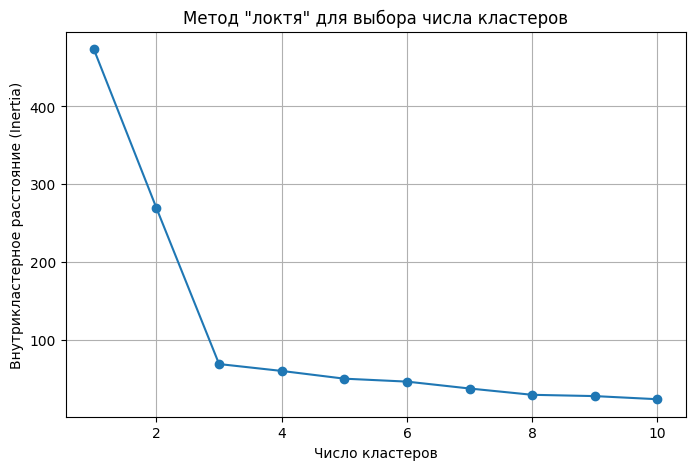

In [26]:
inertia_values = []

k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data3[['x', 'y']])
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Метод "локтя" для выбора числа кластеров')
plt.xlabel('Число кластеров')
plt.ylabel('Внутрикластерное расстояние (Inertia)')
plt.grid()
plt.show()

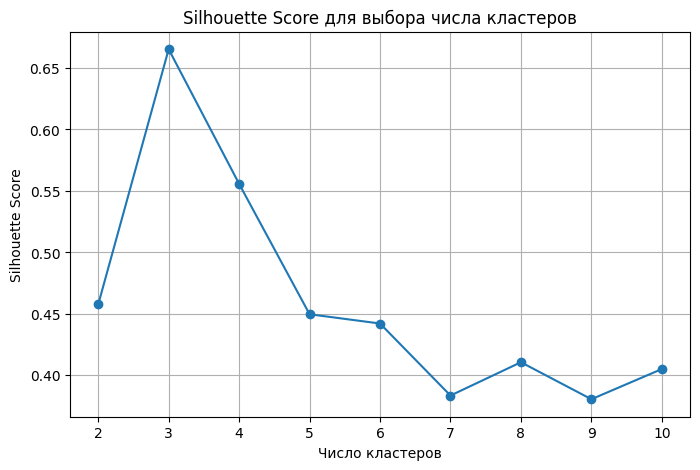

In [24]:
from sklearn.metrics import silhouette_score


silhouette_scores = []

for k in k_values:
    if k > 1:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data3[['x', 'y']])
        score = silhouette_score(data3[['x', 'y']], kmeans.labels_)
        silhouette_scores.append(score)


plt.figure(figsize=(8, 5))
plt.plot(k_values[1:], silhouette_scores, marker='o')
plt.title('Silhouette Score для выбора числа кластеров')
plt.xlabel('Число кластеров')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

Решите задачу с "эффективным числом кластеров". Используйте метод инициализации ``k=means++`` (помогает найти "хороший" оптимум):

``kmeans = KMeans(n_clusters=XXX, init='k-means++')``


Покажите:

* раскарашенный график
* значение внутрикластерного расстояния
* значения центров кластеров (``kmeans.cluster_centers_``)
* Посчитатйе точность решения, сравнив с истинными значеними меток класторов (``sklearn.metrics.rand_score(labels_true, labels_pred)``)

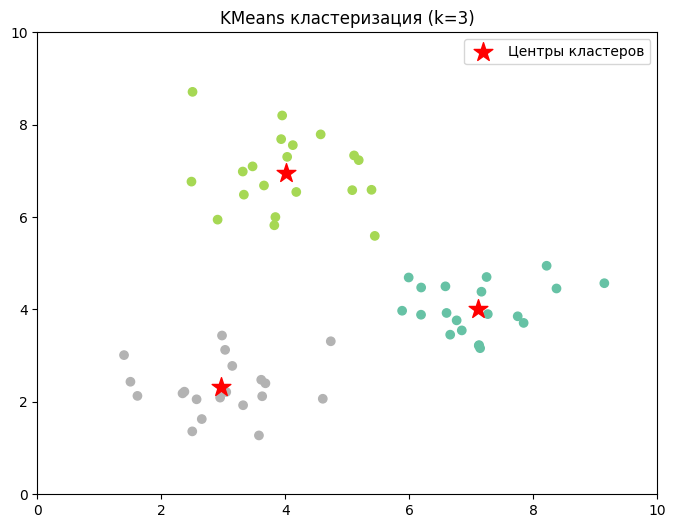

Внутрикластерное расстояние (Inertia): 68.57228062739242
Центры кластеров:
 [[7.10427108 4.01726805]
 [4.01547559 6.94556082]
 [2.96188789 2.31301884]]
Rand Score (точность): 1.0


In [27]:
from sklearn.metrics import rand_score


kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(data3[['x', 'y']])


data3['predicted_labels'] = kmeans.labels_


fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(data3['x'], data3['y'], c=data3['predicted_labels'], cmap='Set2')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=200, color='red', label='Центры кластеров')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.legend()
plt.title('KMeans кластеризация (k=3)')
plt.show()


print("Внутрикластерное расстояние (Inertia):", kmeans.inertia_)
print("Центры кластеров:\n", kmeans.cluster_centers_)


rand_accuracy = rand_score(data3['label'], data3['predicted_labels'])
print("Rand Score (точность):", rand_accuracy)